### **W10 - Class Assignment Data Mining**

## **Part A – Data Preparation**

In [245]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [246]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [247]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={"Annual Income (k$)": "AnnualIncome", "Spending Score (1-100)": "SpendingScore"})
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [248]:
# describe data
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


In [249]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [250]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Income': array([66161.01279, 78639.20248, 70207.25321, 65866.23872, 56774.10995,
        73442.05848, 57819.04084, 91882.97506, 97274.70704, 53758.11391,
        84379.37786, 64667.11898, 67603.34208, 94419.74787, 30327.70436,
        31534.69748, 26516.37981, 87446.48842, 83361.75632, 90250.91112,
        98396.37567, 84936.89232, 59610.95217, 83539.68822, 33870.58194,
        72994.0766 , 35751.49656, 95850.16878, 64138.62413, 56099.6455 ,
        44841.67091, 83067.52671, 59211.27492, 67632.54617, 26409.23503,
        71322.66228, 70907.1792 , 71270.04977, 95781.10589, 76136.52243,
        51963.09254, 57777.39653, 77322.33969, 29516.91037, 75007.50366,
        75297.84022, 40778.69208, 34669.47232, 48657.12632, 52278.30782,
        67764.75778, 57895.11351, 99128.03785, 32653.36081, 40665.75671,
        37098.21384, 73983.12441, 43996.87019, 59973.30796, 43331.9194 ,
        36922.71877, 33278.13559, 74224.71921, 35363.72135, 39743.67713,
        52654.3878 , 86574.49224, 32282.5

#### **Encoding**

In [251]:
from sklearn.preprocessing import OrdinalEncoder

# 1. Ordinal Encoding untuk Education (ordinal)
education_mapping = {
    'High School': 0,
    'Bachelor': 1,
    'Master': 2,
    'PhD': 3
}

df['Education'] = df['Education'].map(education_mapping)

# Kalau mau lihat mapping-nya
import pprint
pprint.pprint({'Education': education_mapping})

df.sample(n=5)

{'Education': {'Bachelor': 1, 'High School': 0, 'Master': 2, 'PhD': 3}}


,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
232,63865.05354,38,3,667,4,72,1211.337326,43256.57678,9139.507208,0.663867,4,0.261784
432,43454.73887,50,1,311,8,77,3234.780785,38358.12794,5686.407953,0.454934,4,0.664967
1,78639.20248,60,0,779,2,27,9797.056371,31501.75884,3991.007637,0.945920,2,0.549358
240,89789.17044,31,3,769,7,31,6256.828773,32826.02582,16619.584930,0.033424,1,0.198485
458,79803.18243,39,3,457,10,72,5208.242721,36692.34987,9099.862363,0.041801,3,0.824535


In [252]:
# Ensure all features used for clustering are numeric.
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Income': array([66161.01279, 78639.20248, 70207.25321, 65866.23872, 56774.10995,
        73442.05848, 57819.04084, 91882.97506, 97274.70704, 53758.11391,
        84379.37786, 64667.11898, 67603.34208, 94419.74787, 30327.70436,
        31534.69748, 26516.37981, 87446.48842, 83361.75632, 90250.91112,
        98396.37567, 84936.89232, 59610.95217, 83539.68822, 33870.58194,
        72994.0766 , 35751.49656, 95850.16878, 64138.62413, 56099.6455 ,
        44841.67091, 83067.52671, 59211.27492, 67632.54617, 26409.23503,
        71322.66228, 70907.1792 , 71270.04977, 95781.10589, 76136.52243,
        51963.09254, 57777.39653, 77322.33969, 29516.91037, 75007.50366,
        75297.84022, 40778.69208, 34669.47232, 48657.12632, 52278.30782,
        67764.75778, 57895.11351, 99128.03785, 32653.36081, 40665.75671,
        37098.21384, 73983.12441, 43996.87019, 59973.30796, 43331.9194 ,
        36922.71877, 33278.13559, 74224.71921, 35363.72135, 39743.67713,
        52654.3878 , 86574.49224, 32282.5

## **Part B – Exploratory Data Analysis**

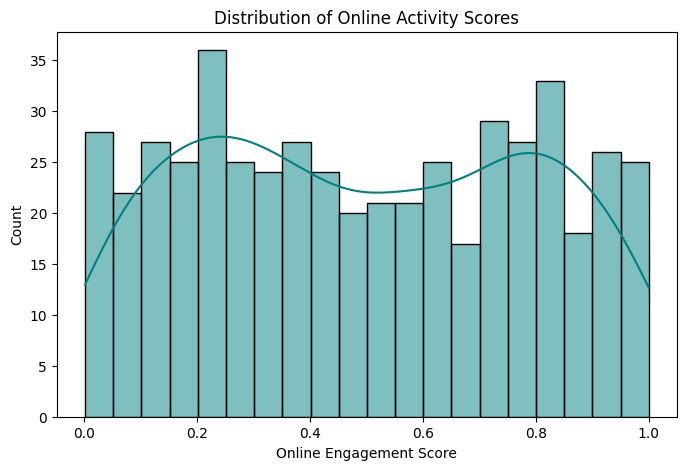

In [253]:
plt.figure(figsize=(8,5))
sns.histplot(df['Online_Activity'], bins=20, kde=True, color='teal')

plt.title('Distribution of Online Activity Scores')
plt.xlabel('Online Engagement Score')
plt.ylabel('Count')
plt.show()

The distribution shows that customers are not uniform in their digital behavior. Instead, they form two noticeable groups: one with lower to moderate online activity (around 0.2–0.3), and another with high engagement (around 0.75–0.85). This suggests that while many customers actively use the bank’s digital platforms, a significant portion still interacts at a minimal or moderate level, indicating different levels of digital adoption across the customer base.

/tmp/ipython-input-1190116625.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




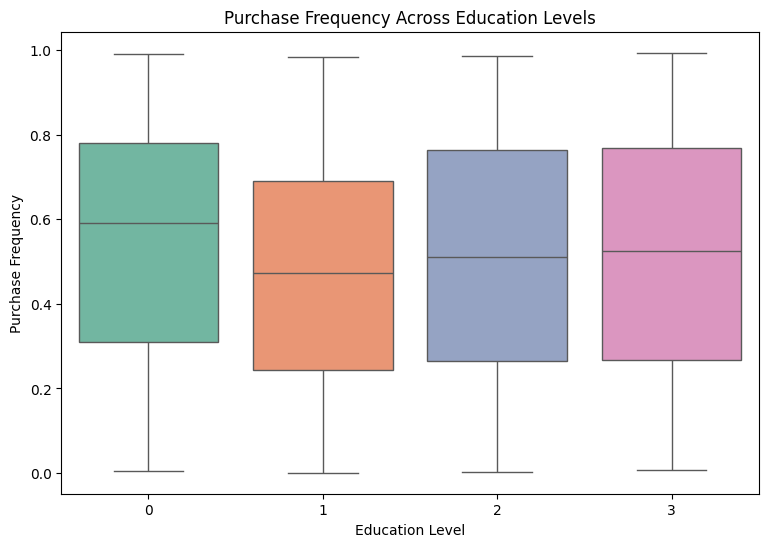

In [254]:
plt.figure(figsize=(9,6))
sns.boxplot(x='Education', y='Purchase_Frequency', data=df, palette='Set2')

plt.title('Purchase Frequency Across Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Purchase Frequency')
plt.show()

All education groups show similar purchase behaviors, but customers with Master’s and PhD degrees tend to have slightly higher median purchase frequency, indicating they shop a bit more often. Meanwhile, High School and Bachelor customers show wider variability, suggesting more diverse spending habits. Overall, education level does not drastically change how frequently customers make purchases, but higher-educated customers lean slightly toward being more consistent shoppers.

## **Part C – Clustering Modeling**

### **Dataset Unscaled**

In [255]:
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,1,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,0,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,0,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,0,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,1,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


Skipping Ward linkage with Manhattan metric (not supported).


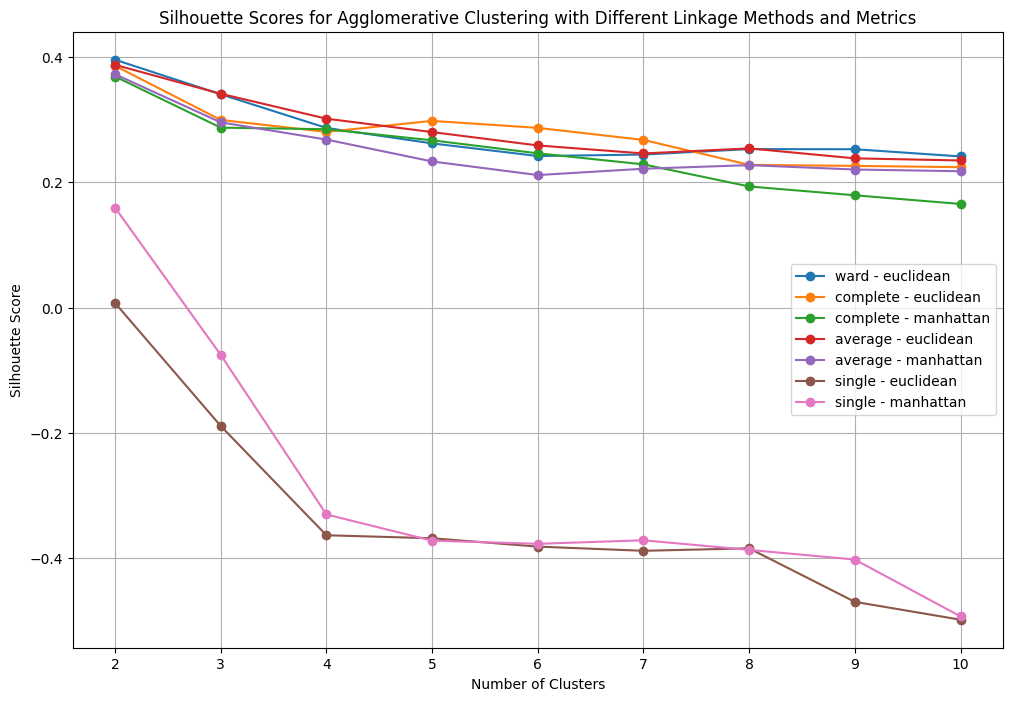

Best Silhouette Score: 0.39572706946177905
Optimal Number of Clusters: 2
Optimal Linkage Method: ward
Optimal Metric: euclidean


In [256]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df)
            silhouette_avg = silhouette_score(df, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

**Hierarchical Clustering**

In [257]:
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df)

In [258]:
# Evaluation
ss = silhouette_score(df, y_hc)
print(ss)

0.39572706946177905


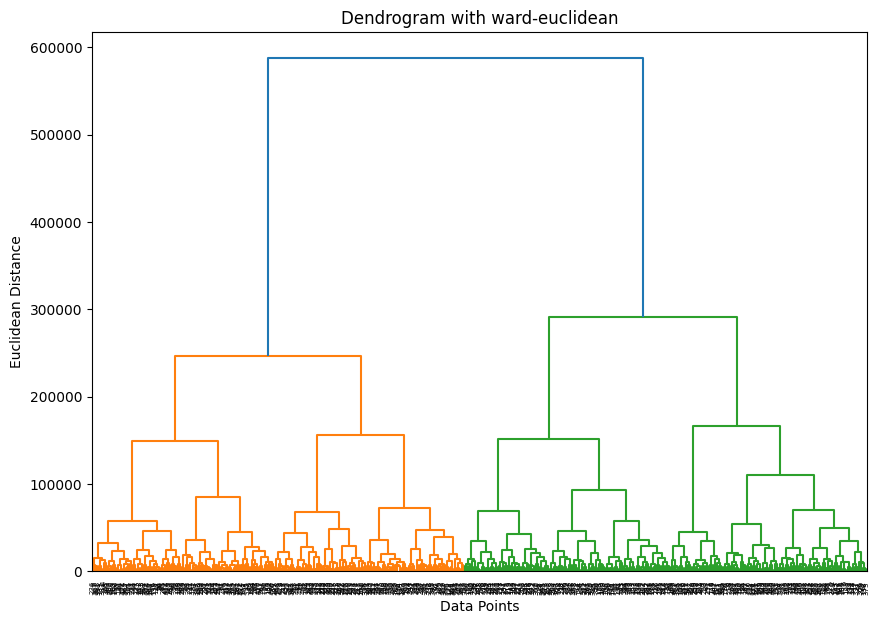

In [259]:
# Average Distance
linked = linkage(df, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

### **Dataset Scaled**

In [260]:
# Scale dataset with standard scaler
# Numerical Columns
num_cols = [
    'Income', 'Age', 'Credit_Score', 'Years_with_Bank', 'Transaction_Count',
    'Balance', 'Loan_Approval_Amount', 'Credit_Card_Limit', 'Purchase_Frequency', 'Online_Activity'
]

# Categorical Columns
cat_cols = ['Education', 'Customer_Satisfaction']

sc = StandardScaler()

df_scaled_num = pd.DataFrame(sc.fit_transform(df[num_cols]), columns=num_cols)
df_sc_scaled = pd.concat([df_scaled_num, df[cat_cols].reset_index(drop=True)], axis=1)
df_sc_scaled.head()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Online_Activity,Education,Customer_Satisfaction
0,0.179150,1.303097,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-0.992013,1,1
1,0.749977,1.533191,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,0.186427,0,2
2,0.364249,0.459420,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,1.184595,0,3
3,0.165665,0.152629,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,-1.274907,0,4
4,-0.250263,-0.307558,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.684898,1,4


Skipping Ward linkage with Manhattan metric (not supported).


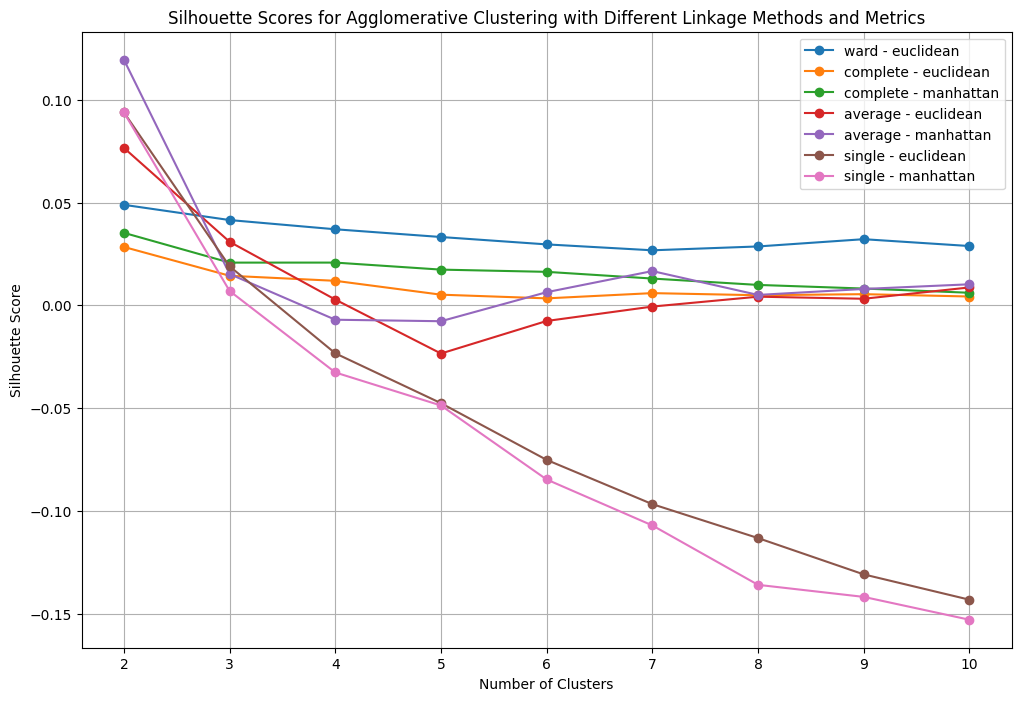

Best Silhouette Score: 0.11941665128362669
Optimal Number of Clusters: 2
Optimal Linkage Method: average
Optimal Metric: manhattan


In [261]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_sc_scaled)
            silhouette_avg = silhouette_score(df_sc_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

In [262]:
# get stastical information on the new dataset
df_sc_scaled.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Online_Activity,Education,Customer_Satisfaction
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,500.000000
mean,2.158274e-16,1.421085e-16,2.593481e-16,1.598721e-16,9.237056e-17,-3.392842e-16,-1.918465e-16,4.085621e-17,1.492140e-16,-8.171241e-17,1.404000,2.564000
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.132851,1.101058
min,-1.687691e+00,-1.688120e+00,-1.666120e+00,-1.905592e+00,-1.653782e+00,-1.716418e+00,-1.706699e+00,-1.723224e+00,-1.811333e+00,-1.676552e+00,0.000000,1.000000
25%,-8.535233e-01,-8.444436e-01,-8.739031e-01,-7.396169e-01,-8.179404e-01,-8.547889e-01,-8.524396e-01,-8.660940e-01,-8.511311e-01,-8.654451e-01,0.000000,2.000000
50%,-3.347132e-02,-7.746485e-02,-1.881200e-02,3.769986e-02,-1.692579e-02,-3.416637e-02,8.970695e-03,1.912909e-02,6.587104e-02,-3.124291e-02,1.000000,3.000000
75%,8.033504e-01,8.429096e-01,7.985545e-01,8.150166e-01,8.189156e-01,8.593735e-01,9.102263e-01,8.839671e-01,8.868705e-01,8.997453e-01,2.000000,4.000000
max,1.723192e+00,1.839982e+00,1.785682e+00,1.592333e+00,1.759237e+00,1.683474e+00,1.725528e+00,1.681174e+00,1.702529e+00,1.717971e+00,3.000000,4.000000


**Hierarchical Clustering**

In [263]:
aggloS = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc_scaled = aggloS.fit_predict(df_sc_scaled)

In [264]:
# Evaluation
ss = silhouette_score(df_sc_scaled, y_hc_scaled)
print(ss)

0.11941665128362669


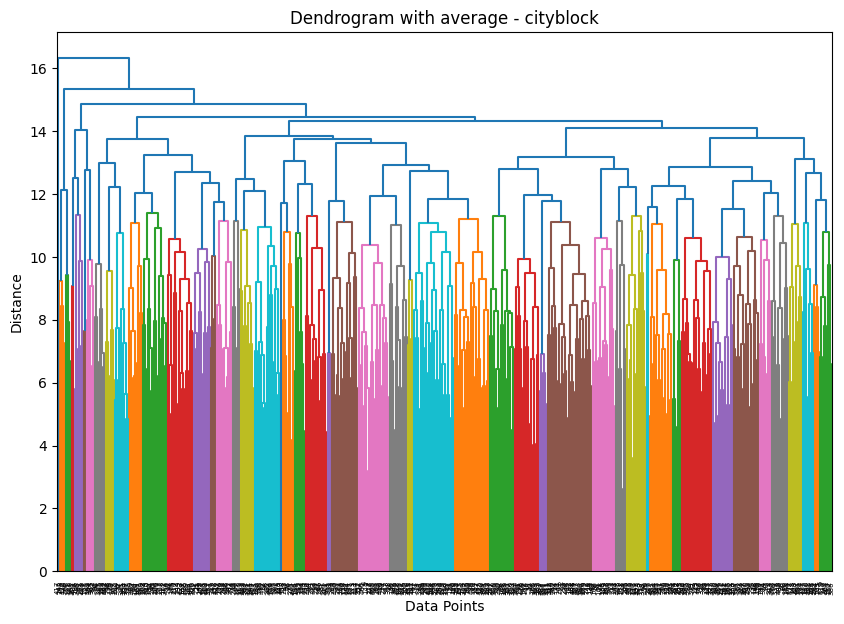

In [265]:
# Average Distance
metric_for_linkage = best_metric

if metric_for_linkage == 'manhattan':
    metric_for_linkage = 'cityblock'

linked = linkage(df_sc_scaled, method=best_linkage, metric=metric_for_linkage)

# Plot dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title(f"Dendrogram with {best_linkage} - {metric_for_linkage}")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


**Merge with the Original Data**

In [266]:
# Add the cluster labels to the original data
df['Agglo (Without Scaled)'] = y_hc
df['Agglo (With Scaled)'] = y_hc_scaled

# Analyze the clusters with the original values
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Agglo (Without Scaled),Agglo (With Scaled)
0,66161.01279,57,1,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,0,0
1,78639.20248,60,0,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,0,0
2,70207.25321,46,0,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,0,0
3,65866.23872,42,0,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,0,0
4,56774.10995,36,1,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,1,0


**Compare cluster quality and interpretability (using metrics such as inertia, silhouette score, or visualization)**

In [267]:
from sklearn.metrics import silhouette_score

feature_cols = df_sc_scaled.columns

# 1. Silhouette Score for Hierarchical - SCALED data
silhouette_scaled = silhouette_score(df_sc_scaled[feature_cols], y_hc_scaled)
print(f"Silhouette Score for Hierarchical (Scaled Data): {silhouette_scaled:.3f}")

# 2. Silhouette Score for Hierarchical - UNSCALED data
silhouette_unscaled = silhouette_score(df[feature_cols], y_hc)
print(f"Silhouette Score for Hierarchical (Unscaled Data): {silhouette_unscaled:.3f}")


Silhouette Score for Hierarchical (Scaled Data): 0.119
Silhouette Score for Hierarchical (Unscaled Data): 0.396


**Visualize clusters using 2D and 3D plots**

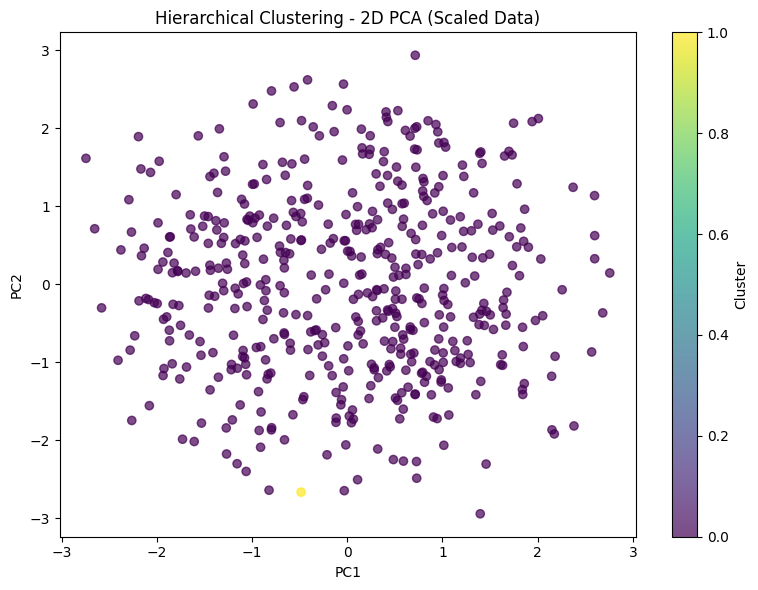

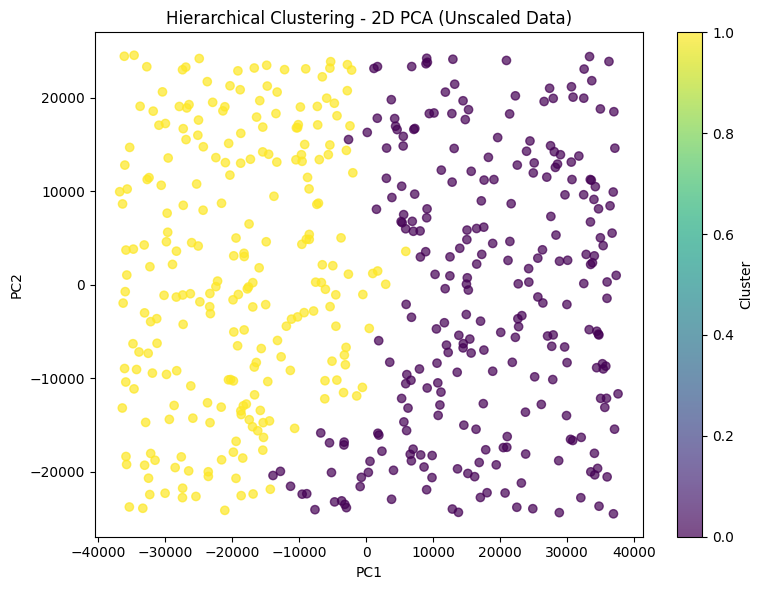

In [268]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Pastikan df_sc_scaled bentuknya DataFrame dengan kolom yang sama seperti df
feature_cols = df_sc_scaled.columns

# ============================
# 1) 2D PCA Plot - SCALED DATA
# ============================

X_scaled = df_sc_scaled[feature_cols]

pca_scaled = PCA(n_components=2)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter1 = plt.scatter(
    X_pca_scaled[:, 0],
    X_pca_scaled[:, 1],
    c=y_hc_scaled,
    cmap='viridis',
    alpha=0.7
)

plt.title("Hierarchical Clustering - 2D PCA (Scaled Data)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter1, label="Cluster")
plt.tight_layout()
plt.show()


# ============================
# 2) 2D PCA Plot - UNSCALED DATA
# ============================

X_unscaled = df[feature_cols]

pca_unscaled = PCA(n_components=2)
X_pca_unscaled = pca_unscaled.fit_transform(X_unscaled)

plt.figure(figsize=(8,6))
scatter2 = plt.scatter(
    X_pca_unscaled[:, 0],
    X_pca_unscaled[:, 1],
    c=y_hc,
    cmap='viridis',
    alpha=0.7
)

plt.title("Hierarchical Clustering - 2D PCA (Unscaled Data)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter2, label="Cluster")
plt.tight_layout()
plt.show()


In [269]:
import plotly.express as px

# ===========================================
# 1) 3D Scatter — UNSCALED Hierarchical
# ===========================================

fig_unscaled = px.scatter_3d(
    df,
    x='Age',
    y='Income',
    z='Credit_Score',
    color=y_hc,
    color_continuous_scale='viridis',
    title='3D Scatter (Unscaled Data): Age vs Income vs Credit Score',
    labels={
        'Age': 'Age',
        'Income': 'Income',
        'Credit_Score': 'Credit Score'
    }
)

fig_unscaled.update_traces(marker=dict(size=6, line=dict(width=0.5, color='DarkSlateGrey')))
fig_unscaled.update_layout(scene=dict(
    xaxis=dict(gridcolor='lightgray', zeroline=False),
    yaxis=dict(gridcolor='lightgray', zeroline=False),
    zaxis=dict(gridcolor='lightgray', zeroline=False)
))

fig_unscaled.show()


# ===========================================
# 2) 3D Scatter — SCALED Hierarchical
# ===========================================

fig_scaled = px.scatter_3d(
    df_sc_scaled.assign(cluster=y_hc_scaled),  # tambahkan cluster ke df scaled
    x='Age',
    y='Income',
    z='Credit_Score',
    color='cluster',
    color_continuous_scale='viridis',
    title='3D Scatter (Scaled Data): Age vs Income vs Credit Score',
    labels={
        'Age': 'Age',
        'Income': 'Income',
        'Credit_Score': 'Credit Score'
    }
)

fig_scaled.update_traces(marker=dict(size=6, line=dict(width=0.5, color='DarkSlateGrey')))
fig_scaled.update_layout(scene=dict(
    xaxis=dict(gridcolor='lightgray', zeroline=False),
    yaxis=dict(gridcolor='lightgray', zeroline=False),
    zaxis=dict(gridcolor='lightgray', zeroline=False)
))

fig_scaled.show()


**Statistical Summary**

In [270]:
# Tambahkan label cluster ke df (unscaled)
df_unscaled_summary = df.copy()
df_unscaled_summary['Cluster'] = y_hc

# Summary statistik per cluster
cluster_summary_unscaled = df_unscaled_summary.groupby('Cluster').agg({
    'Income': ['mean', 'median'],
    'Age': ['mean', 'median'],
    'Education': ['first', 'count'],
    'Credit_Score': ['mean', 'median'],
    'Years_with_Bank': ['mean', 'median'],
    'Transaction_Count': ['mean', 'median'],
    'Balance': ['mean', 'median'],
    'Loan_Approval_Amount': ['mean', 'median'],
    'Credit_Card_Limit': ['mean', 'median'],
    'Purchase_Frequency': ['mean', 'median'],
    'Customer_Satisfaction': ['first', 'count'],
    'Online_Activity': ['mean', 'median']
})

cluster_summary_unscaled = cluster_summary_unscaled.rename_axis("Cluster (Unscaled)")
cluster_summary_unscaled

Income                      Age        Education  \
                            mean        median       mean median     first   
Cluster (Unscaled)                                                           
0                   80056.384759  79406.824155  40.007692   40.0         1   
1                   42948.964656  43031.839495  40.012500   39.0         1   

                         Credit_Score        Years_with_Bank         ...  \
                   count         mean median            mean median  ...   
Cluster (Unscaled)                                                   ...   
0                    260   566.538462  567.0       10.584615   10.0  ...   
1                    240   563.316667  557.5       11.045833   11.0  ...   

                   Loan_Approval_Amount              Credit_Card_Limit  \
                                   mean       median              mean   
Cluster (Unscaled)                                                       
0                          24079.854446  24198.63925      10299.053313   
1                          26820.821008  25687.80204      10946.801520   

                                 Purchase_Frequency            \
                          median               mean    median   
Cluster (Unscaled)                                              
0                    9998.713354           0.518549  0.530242   
1                   11475.669915           0.506474  0.532515   

                   Customer_Satisfaction       Online_Activity            
                                   first count            mean    median  
Cluster (Unscaled)                                                        
0                                      1   260        0.473096  0.420355  
1                                      4   240        0.517722  0.529484  

[2 rows x 24 columns]

In [271]:
# Tambahkan label cluster ke df (scaled version)
df_scaled_summary = df.copy()
df_scaled_summary['Cluster'] = y_hc_scaled

# Summary statistik per cluster (ASLI, bukan scaled values)
cluster_summary_scaled = df_scaled_summary.groupby('Cluster').agg({
    'Income': ['mean', 'median'],
    'Age': ['mean', 'median'],
    'Education': ['first', 'count'],
    'Credit_Score': ['mean', 'median'],
    'Years_with_Bank': ['mean', 'median'],
    'Transaction_Count': ['mean', 'median'],
    'Balance': ['mean', 'median'],
    'Loan_Approval_Amount': ['mean', 'median'],
    'Credit_Card_Limit': ['mean', 'median'],
    'Purchase_Frequency': ['mean', 'median'],
    'Customer_Satisfaction': ['first', 'count'],
    'Online_Activity': ['mean', 'median']
})

cluster_summary_scaled = cluster_summary_scaled.rename_axis("Cluster (Scaled)")
cluster_summary_scaled


Income                   Age        Education        \
                          mean       median     mean median     first count   
Cluster (Scaled)                                                              
0                 62317.652982  61604.22105  40.0501   39.0         1   499   
1                 25902.716720  25902.71672  20.0000   20.0         0     1   

                 Credit_Score        Years_with_Bank         ...  \
                         mean median            mean median  ...   
Cluster (Scaled)                                             ...   
0                  564.865731  562.0       10.825651   11.0  ...   
1                  628.000000  628.0        1.000000    1.0  ...   

                 Loan_Approval_Amount              Credit_Card_Limit  \
                                 mean       median              mean   
Cluster (Scaled)                                                       
0                        25399.756835  25552.74322      10609.692493   
1                        23280.537120  23280.53712      10749.672250   

                              Purchase_Frequency            \
                       median               mean    median   
Cluster (Scaled)                                             
0                 10706.42420           0.511847  0.530807   
1                 10749.67225           0.964640  0.964640   

                 Customer_Satisfaction       Online_Activity            
                                 first count            mean    median  
Cluster (Scaled)                                                        
0                                    1   499        0.494823  0.487052  
1                                    1     1        0.341360  0.341360  

[2 rows x 24 columns]

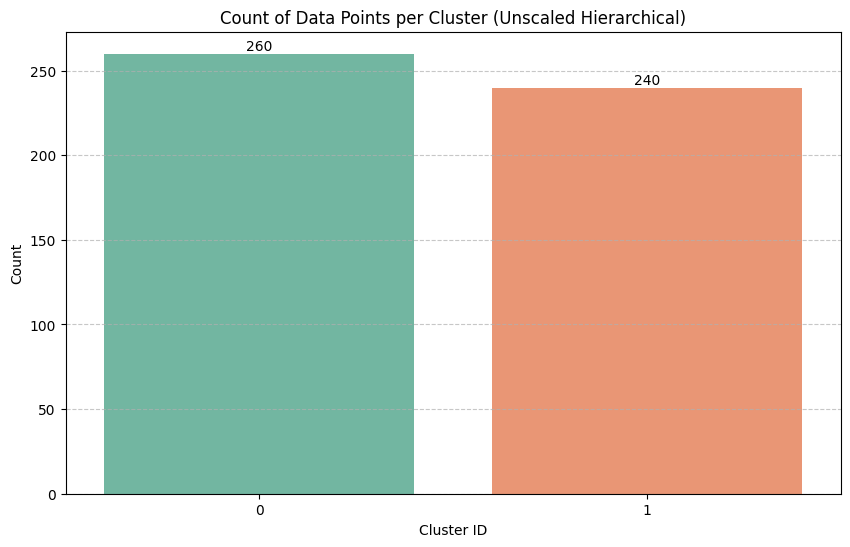

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan df punya kolom Cluster dari hierarchical unscaled
df_unscaled_summary['Cluster'] = y_hc

# Hitung jumlah data di setiap cluster
cluster_counts = df_unscaled_summary['Cluster'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=cluster_counts.index,
    y=cluster_counts.values,
    hue=cluster_counts.index,
    palette='Set2',
    legend=False
)

# Tambahkan label angka di atas bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

# Labeling
plt.title('Count of Data Points per Cluster (Unscaled Hierarchical)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

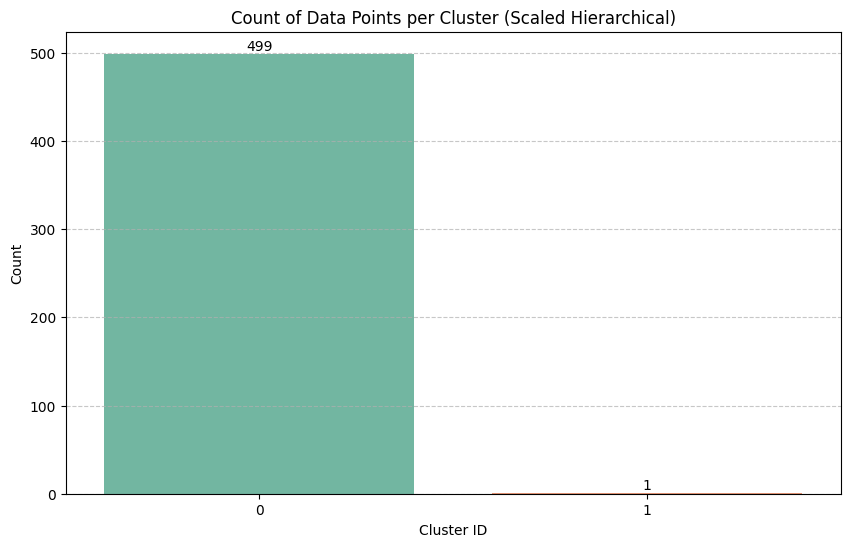

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan df memiliki kolom cluster untuk scaled version
df_scaled_summary = df.copy()
df_scaled_summary['Cluster'] = y_hc_scaled

# Hitung jumlah data per cluster
cluster_counts_scaled = df_scaled_summary['Cluster'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=cluster_counts_scaled.index,
    y=cluster_counts_scaled.values,
    hue=cluster_counts_scaled.index,
    palette='Set2',
    legend=False
)

# Tambahkan label jumlah pada bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

# Labeling
plt.title('Count of Data Points per Cluster (Scaled Hierarchical)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Part D – Segmentation & Managerial Implication**

#### **1. Summarize and discuss which model is better:**

**Which version (scaled or unscaled) produces clearer cluster separation?**

The unscaled hierarchical model produces significantly clearer cluster separation compared to the scaled version.
This is supported by both the silhouette score and the PCA visualizations:
* Silhouette Score (Unscaled): 0.396
* Silhouette Score (Scaled): 0.119

The unscaled model achieves far better cohesion within clusters and stronger separation between them.
The PCA plot also shows two well-defined clusters with a clear boundary, while the scaled version shows overlapping clusters with no distinct separation.


**Why does scaling affect the clustering result?**

Scaling affects distance-based algorithms such as hierarchical clustering because it changes the influence of each feature on the distance calculations.

* In unscaled data, meaningful financial variables such as Income, Credit Card Limit, Balance, and Credit Score naturally have large numerical differences that reflect real customer behavior.
These large natural variances help the algorithm separate customers into distinct financial groups.
* When using StandardScaler, all features are forced to have the same mean and variance.

This reduces the impact of financially important variables, causing the clustering algorithm to treat all features as equally important, even if they are not equally meaningful. As a result, scaling flattens natural differences, causing clusters to overlap and reducing separation quality.

#### **2. Analyze and interpret each cluster’s characteristics**

**Cluster 0 — High-Income, High-Credit, Financially Strong Customers**

Characteristics
* Higher Income (avg ~80,000+)
* Higher Credit Score (above 560)
* Higher Credit Card Limit
* Larger Loan Approval Amount
* Moderate to high account balance
* Older age on average
* Longer years with the bank (loyal, established customers)
* Moderate online activity and purchase frequency

**Interpretation**

Cluster 0 represents financially strong, mature customers with high income and excellent credit profiles.
They are likely long-term customers who maintain higher balances, qualify for larger loans, and exhibit responsible financial behavior.

**Cluster 1 — Young, digitally active customers with lower income.**

Characteristics
* Lower Income
* Lower Credit Score
* Lower loan approval amounts and card limits
* Younger age group
* Higher online engagement (active app users)
* Higher purchase frequency

**Interpretation**
Cluster 1 represents younger, digitally active customers who rely heavily on mobile banking and online transactions. Their financial capacity is smaller, but they show high engagement potential and can become loyal long-term customers if nurtured properly.

**3. Provide managerial recommendations**

Cluster 0 (n = 260) — High-income, financially stable, long-term loyal customers

**Profile**

* Higher annual income
* Higher credit score
* Larger credit card limits
* Larger approved loan amounts
* Older age group
* Longer relationship with the bank (higher Years_with_Bank)
* Moderate online activity

**Meaning**

This cluster represents premium customers with strong financial capacity and low credit risk.
They tend to be long-term loyal customers and generate higher profitability for the bank.

**Strategies**

* Enhance premium banking services
* Wealth management, investment advisory, retirement planning
* Priority banking with dedicated relationship managers
* Cross-sell high-value financial products
* Insurance bundles, premium credit cards, investment products
* Personalized offers based on financial behavior
* Strengthen loyalty programs
* Exclusive rewards, tiered VIP programs
* Early access to new financial products

**Key KPIs**
* Customer Lifetime Value (CLV)
* Product uptake for premium offerings
* Long-term retention
* Assets Under Management (AUM)

Cluster 1 (n = 240) — Young, lower-income, highly digital and active customers

**Profile**

* Lower income
* Lower credit scores and smaller credit limits
* Smaller loan approvals
* Younger age group
* Higher online engagement
* More frequent digital activity and purchases

**Meaning**

This cluster represents digitally active young customers who frequently use mobile banking and online services.
Although their financial capacity is lower, they have high engagement potential and can grow into profitable customers over time.

**Strategies**

* Develop entry-level financial products
* Starter credit cards, micro-loans, flexible savings accounts
* Simple insurance products or digital-only financial bundles
* Boost digital engagement
* Gamified rewards, cashback for app usage, referral bonuses
* Personalized in-app recommendations
* Provide financial education & credit-building support
* Budgeting tools, credit score improvement tips
* Financial literacy content targeted to younger users

**Key KPIs**
* Daily/Monthly Active Users (DAU/MAU)
* Conversion rate for entry-level products
* Digital engagement metrics
* 90-day retention